# Project Name: Twitter Sentiment Analysis
The goal of this project is to detect hate speech in tweets using Natural Language Processing and machine learning techniques. For the purpose of this study, a tweet is labeled as hate speech if it conveys racist or sexist sentiment. All other tweets are categorized as non-offensive. By developing this classifier, the project aims to contribute to the broader effort of moderating online platforms and promoting safer digital communities.

# Problem Definition:
The primary aim of this analysis is to detect hate speech in tweets.

# Dataset Description

The dataset used in this project was sourced from Kaggle. It is a labelled dataset of 31,962 tweets. The dataset is provided in a csv file and consist of three columns: id, label and tweet.

•	Hate Speech → Tweets containing racist or sexist content (labelled as '1' in the dataset)

•	Non-Hate Speech → All other tweets (labelled as '0' in the dataset)

source of dataset: https://www.kaggle.com/datasets/durgeshrao9993/twitter-analysis-dataset-2022



## Table of Contents

1. Import necessary libraries
2. Reading the data
3. Data Cleaning
4. Exploratory Data Analysis
5. Text Preprocessing & Data Visualization (wordcloud)
6. Bag of Words (BOG)
7. Train Test Split
8. Machine Learning Classifiers




Let us now start the project by reading some useful libraries that we would be working with from the start. 

# 1. Import necessary libraries

In [1]:
# Data Manipulation & Utilities
import pandas as pd
import numpy as np
import string
import re
from collections import Counter
from tqdm import tqdm

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Natural Language Processing (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Machine Learning Models (scikit-learn)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier



# 2. Reading the data

In [2]:
# define a variable called 'df' to store the dataframe
df = pd.read_csv('twitter.csv')

# print the first five (5) rows in the dataframe
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
#  number of rows and columns in the dataset
df.shape

(31962, 3)

# 3. Data Cleaning

In [4]:
# check for missing values
df.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [5]:
# check for duplicated values
df.duplicated().sum()

0

In [6]:
# drop unnecessary columns
df = df.drop(columns = {'id'})

In [7]:
# check the dataframe to see if the column has been dropped
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


# 4. Exploratory data analysis

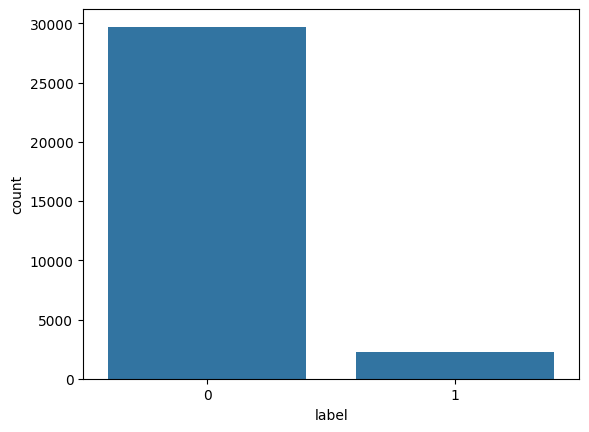

In [8]:
sns.countplot(x = 'label', data = df)
plt.show()

# 5. Text Preprocessing

## 5.1 Normalization:
Converting all text to a standard format, such as lowercase and removing punctuation or stopwords.

In [9]:
def clean_tweet(tweet):
    # Lowercase
    tweet = tweet.lower()
    # Remove HTML tags
    tweet = re.sub(r'<.*?>', ' ', tweet)
    # Remove URLs
    tweet = re.sub(r'http\S+|www\.\S+', ' ', tweet)
    # Remove numbers
    tweet = re.sub(r'\d+', ' ', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove extra spaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    # Remove non-alphabetic characters
    tweet = re.sub(r'[^A-Za-z\s]', ' ', tweet)
    
    return tweet

In [10]:
# apply preprocessing
df["tweet"] = df["tweet"].astype(str).apply(clean_tweet)

In [11]:
df.head()

,label,tweet
0,0,user when a father is dysfunctional and is so ...
1,0,user user thanks for lyft credit i cant use ca...
2,0,bihday your majesty
3,0,model i love u take with u all the time in ur ...
4,0,factsguide society now motivation


In [12]:
df['tweet'].head()

0    user when a father is dysfunctional and is so ...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model i love u take with u all the time in ur ...
4                    factsguide society now motivation
Name: tweet, dtype: object

## 5.2 Identifying and removing stopwords

In [13]:
# create a new dataframe with the frequency of each word to filter out the stopwords for their removal

def tokenize(tweet):
    words = tweet.split()
    return words

# Creating a new column by applying tokenization to the tweet column
df['tweet'] = df['tweet'].apply(tokenize)

# flatten the list of words from all rows
all_words = [word for words in df['tweet'] for word in words]

# Count the frequency of each word
word_freq = Counter(all_words)

# Converting the word frequencies to a DataFrame 
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Sorting the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

In [14]:
word_list = word_freq_df['Word'].tolist()
print(len(word_list))   # displays the total number of unique stopwords in the dataset

39549


In [15]:
# print the first 200 most frequently occuring words in the dataset
print(word_list[:200])  

['user', 'the', 'to', 'a', 'i', 'you', 'and', 'in', 'for', 'is', 'of', 'my', 'love', 'this', 'on', 'it', 'with', 'be', 'day', 'so', 'all', 'are', 'that', 'me', 'happy', 'your', 'at', 'have', 'amp', 'just', 'we', 'its', 'will', 'when', 'not', 'am', 'do', 'u', 'like', 'im', 'life', 'time', 'but', 'what', 'from', 'up', 'today', 'now', 'new', 'as', 'out', 'positive', 'thankful', 'get', 'was', 'about', 'people', 'our', 'bihday', 'how', 'good', 'by', 'no', 'cant', 'one', 'can', 'see', 'dont', 'more', 'smile', 'they', 'fathers', 'if', 'go', 'want', 'take', 'work', 'who', 'healthy', 'fun', 'weekend', 'an', 'has', 'summer', 'or', 'make', 'got', 'days', 'family', 'friday', 'us', 'best', 'need', 'his', 'way', 'beautiful', 'great', 'he', 'friends', 'bull', 'why', 'only', 'going', 'there', 'first', 'really', 'their', 'wait', 'here', 'morning', 'music', 'ur', 'back', 'world', 'some', 'been', 'fathersday', 'know', 'very', 'tomorrow', 'cute', 'week', 'orlando', 'sad', 'never', 'her', 'think', 'too', '

In [16]:
# downloading the nltk library defined stopword list

nltk.download('stopwords')
stop = stopwords.words('english')
print()
print(len(stop))


198


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JOEL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
print(stop) # complete list of nltk stopwords

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [18]:
# final list of stopwords created by analysing actual word counts in our dataset and using nltk library stopwords

final_stopwords=['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'ð', 'â', 
'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 
'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', 
"couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 
'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 
'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 
'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 
'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", 
"it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', 
"mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 
'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 
'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she'd", 
"she'll", "she's", 'should', 'shouldn', "shouldn't", "should've", 'so', 'some', 'such', 't', 
'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 
'they', "they'd", "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 
'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we', "we'd", "we'll", "we're", 'were', 'weren', 
"weren't", "we've", 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 
'won', "won't", 'wouldn', "wouldn't", 
'y', 'you', "you'd", "you'll", 'your', "you're", 'yours', 'yourself', 'yourselves', "you've",
'user', 'the', 'to', 'a', 'i', 'you', 'and', 'in', 'for', 'is', 'of', 'my', 'this', 'on', 'with', 'it', 'be', 'so', 
'are', 'that', 'me', 'your', 'at', 'have', 'amp', 'just', 'its', 'we', 'will', 'when', 'not', 'am', 'do', 'u', 'im', 
'like', 'time', 'life', 'but', 'what', 'from', 'â\x80¦', 'as', 'was', 'about', 'our', 'how', 'by', 'no', 'cant', 
'can', 'dont', 'more', 'they', 'if', 'who', 'an','weekend', 'has', 'or', 'his', 'he', 'only', 'why',  'there', 
'their', 'here', 'music', 'some', 'been', 'very', 'her', 'being', 'too', 'after', 
'had', 'were', 'even', 'youre', 'because', 'them', 'come', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'urð\x9f\x93±', 
'over',  'than', 'these', 'â\x86\x9d', 'iam', 'thanks', 'makes', 'altwaystoheal', 'via', 
'then', 'she','again', 'him','down']

final_stopwords=list(set(final_stopwords))
print(len(final_stopwords))

224


In [19]:
df['tweet'] = df['tweet'].apply(
    lambda x: ' '.join([word for word in (x if isinstance(x, list) else str(x).split()) if word not in final_stopwords])
)


## 5.3 Data Visualization after stopword removal

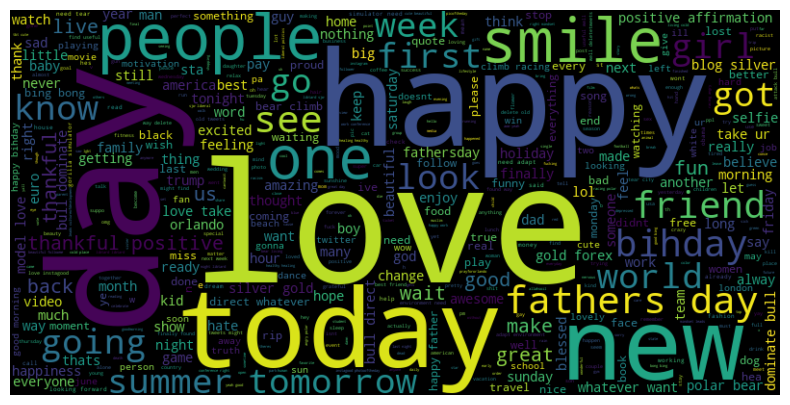

In [20]:
# Data Visualization (using WordCloud) for all the tweets [greater size of word means greater frequency]

text = ' '.join(df['tweet']) 

wordcloud = WordCloud(max_words=2000, width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
## Taking separate dataframes for different values such as positive, negative and neutral reviews respectively. 

positive_df = df[df['label'] == 0]
negative_df = df[df['label'] == 1]

## 5.3.1 Positive Text WordCloud

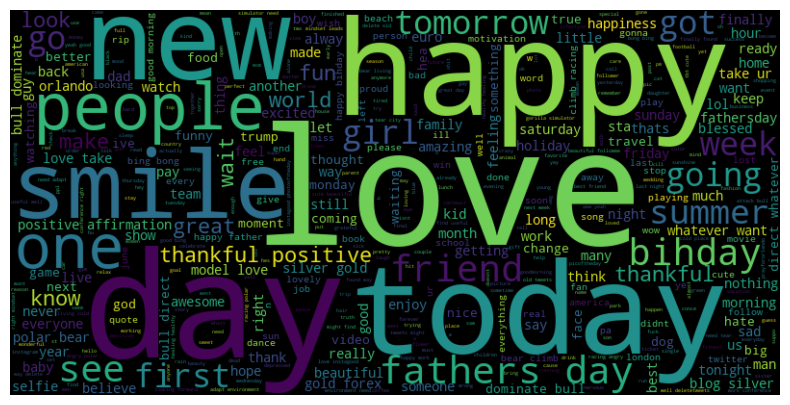

In [22]:
# Data Visualization for all positive tweets

text = ' '.join(positive_df['tweet']) 

wordcloud = WordCloud(max_words=2000, width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 5.3.1 Negative Text WordCloud

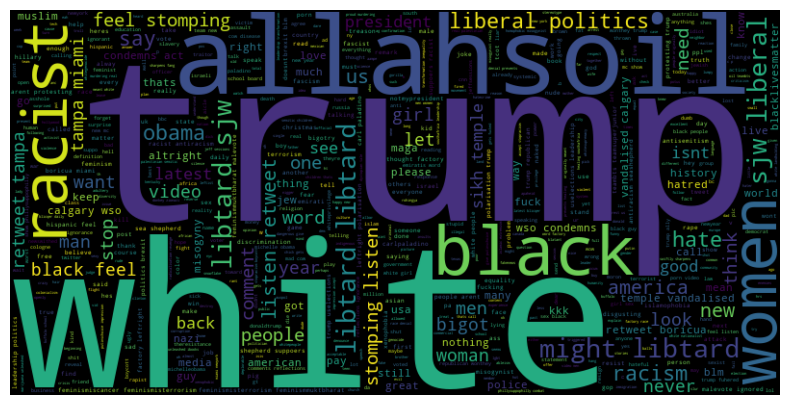

In [23]:
# Data Visualization for all negative tweets

text = ' '.join(negative_df['tweet']) 

wordcloud = WordCloud(max_words=2000, width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 5.4 Tokenization & Stemming

In [24]:
# create a PorterStemmer object to reduce words to their root form
ps = PorterStemmer()

In [25]:
def tokenize_and_stem(tweet):
    words = word_tokenize(tweet)
    stemmed_words = [ps.stem(word) for word in words]
    return ' '.join(stemmed_words)

In [26]:
tqdm.pandas()  # Enable progress bar with tqdm
df['tweet'] = df['tweet'].progress_apply(tokenize_and_stem)

100%|██████████████████████████████████████████████████████████████████████████| 31962/31962 [00:05<00:00, 5794.16it/s]


In [27]:
# Print the processed/stemmed version (from the 'tweet' column) at row index 794311
print(df['tweet'][30000])

never msg first dun msg firstdisappoint


## 6. BOW Technique

In [28]:
df.head()

,label,tweet
0,0,father dysfunct selfish drag kid dysfunct run
1,0,lyft credit use caus offer wheelchair van pdx ...
2,0,bihday majesti
3,0,model love take ur
4,0,factsguid societi motiv


In [29]:
# considering first 7000 most frequent words in dataset for vector representation
cv=CountVectorizer(max_features=7000) 

In [30]:
# Separating feature and labels
X=df['tweet']
y=df['label']

In [31]:
vectors=cv.fit_transform(X).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## 7. Train test split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(vectors, y, test_size=0.2)

## 8. Machine Learning Classifiers (LR, MNB, SVM)

## 8.1 Linear Regression

In [33]:
logr = LogisticRegression(max_iter = 500)

In [34]:
logr.fit(X_train,y_train) # model training

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [35]:
y_pred_logr = logr.predict(X_test) # prediction on test dataset

In [36]:
# model prediction accuracy
logr_score = accuracy_score(y_test,y_pred_logr)
print(logr_score)

0.9587048334115439


In [37]:
print(classification_report(y_test, y_pred_logr)) 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5933
           1       0.84      0.53      0.65       460

    accuracy                           0.96      6393
   macro avg       0.90      0.76      0.81      6393
weighted avg       0.96      0.96      0.95      6393



## 8.2 Multinolmial Naive Bayes

In [38]:
nb = MultinomialNB()

In [39]:
nb.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [40]:
y_pred_nb = nb.predict(X_test)

In [41]:
nb_score = accuracy_score(y_test, y_pred_nb)
print(nb_score)

0.9469732519943689


In [42]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5933
           1       0.61      0.72      0.66       460

    accuracy                           0.95      6393
   macro avg       0.80      0.84      0.82      6393
weighted avg       0.95      0.95      0.95      6393



## 8.3 Support Vector Machine

In [43]:
svc = LinearSVC(max_iter=5000)  # model initialization
svc.fit(X_train, y_train)  # model training

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [44]:
y_pred_svc = svc.predict(X_test)  # prediction on test dataset

In [45]:
# model prediction accuracy
svc_score = accuracy_score(y_test, y_pred_svc)
print(svc_score)

0.9566713592992335


In [46]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5933
           1       0.73      0.63      0.68       460

    accuracy                           0.96      6393
   macro avg       0.85      0.81      0.83      6393
weighted avg       0.95      0.96      0.96      6393

